ASL classification model (in progress)

Library Loading

In [2]:
import torch.nn as nn
import pandas as pd
import torch
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader

Download and import American Sign Language Dataset available at Kaggle

In [3]:
training_df = pd.read_csv("data/asl_dataset/sign_training.csv")
validation_df = pd.read_csv("data/asl_dataset/sign_validation.csv")

In [4]:
'''Explore dataframes using training_df.head() and validation_df.head()'''

'Explore dataframes using training_df.head() and validation_df.head()'

Remove labels from dataframes and assign them to created variables

In [5]:
y_training = training_df.pop('label')
y_validation = validation_df.pop('label')

Store image values in created variables

In [6]:
x_training = training_df.values
x_validation = validation_df.values

In [7]:
'''Print y_training.shape() y_validation.shape() x_training.shape() or x_validation.shape() 
to check the number of images, how many pixels they contain and the corresponding number of labels.

'''

'Print y_training.shape() y_validation.shape() x_training.shape() or x_validation.shape() \nto check the number of images, how many pixels they contain and the corresponding number of labels.\n\n'

Data visualisation

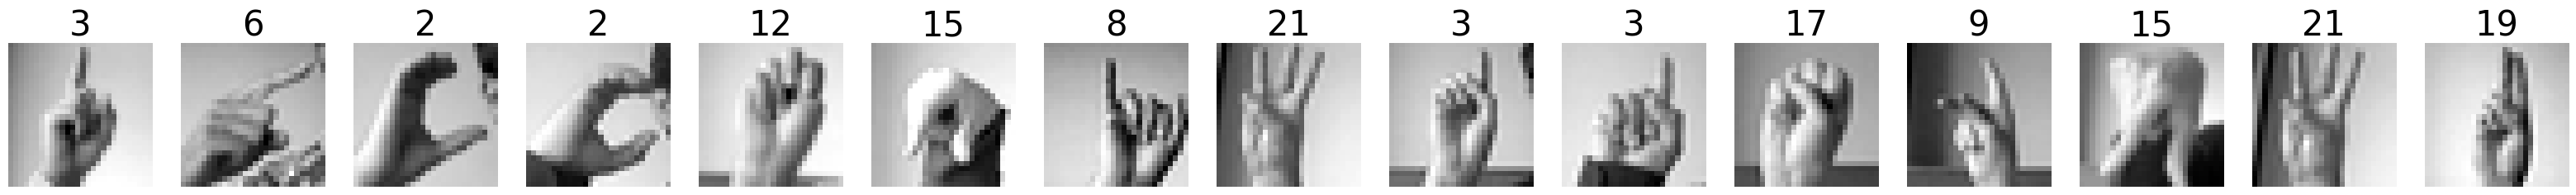

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))

num_images = 15
for i in range(num_images):
    row = x_training[i]
    label = y_training[i]

    image = row.reshape(28,28)
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

Data normalization

In [9]:
x_training = training_df.values / 255
x_validation = validation_df.values / 255

Custom Datasets

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.is_available()

False

In [11]:
class MyDataset(Dataset):
    def __init__(self, x_df, y_df):
        self.xs = torch.tensor(x_df).float().to(device)
        self.ys = torch.tensor(y_df).to(device)

    def __getitem__(self, idx):
        x = self.xs[idx]
        y = self.ys[idx]
        return x, y

    def __len__(self):
        return len(self.xs)

In [12]:
BATCH_SIZE = 32

training_data = MyDataset(x_training, y_training)
training_loader = DataLoader(training_data, batch_size=BATCH_SIZE, shuffle=True)
training_N = len(training_loader.dataset)

In [13]:
validation_data = MyDataset(x_validation, y_validation)
validation_loader = DataLoader(validation_data, batch_size=BATCH_SIZE)
validation_N = len(validation_loader.dataset)

In [14]:
'''
training_loader
batch = next(iter(train_loader))
batch 
'''

'\ntraining_loader\nbatch = next(iter(train_loader))\nbatch \n'

Building model: Neural Network

In [15]:
'''24 categories because 2 of 26 sign letters require movement to be shown'''

'24 categories because 2 of 26 sign letters require movement to be shown'

In [16]:
image_size = 28*28
n_categories = 24 

In [17]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(image_size, 512),
    nn.ReLU(),
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Linear(512, n_categories)
)

model = torch.compile(model.to(device))
optimizer = Adam(model.parameters())
loss_function = nn.CrossEntropyLoss()
model

OptimizedModule(
  (_orig_mod): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=512, bias=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=512, bias=True)
    (4): ReLU()
    (5): Linear(in_features=512, out_features=24, bias=True)
  )
)